Assume you want to travel to Goa but you dont know how to plan. You check with first friend and he gives some input. You take first friend input and explain to 2nd friend and he gives you some more input and you take both inputs and give to 3rd friend, he also add some more inputs. This will continue until you have a concrete plan.

### Why trees are used?

Any algo could have been used as a base, but the reasons for choosing tree are:

Pros:

1. computational scalability
2. handling missing values
3. robust to outliers
4. doesn't require feature scaling
5. can deal with irrelevant inputs
6. handles mixed predictors as well (quantitative and qualitative)

Cons:

1. inability to extract a linear combination of features
2. high variance leading to a small computational power

And thats where boosting comes into picture.It minimises the variance by taking into consideration the results from various other trees

In [16]:
#Important Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing, Normalizing

from sklearn.preprocessing import StandardScaler

#Models
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Metrics

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
data.shape

(506, 14)

In [4]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
corr = data.corr()
corr.shape

(14, 14)

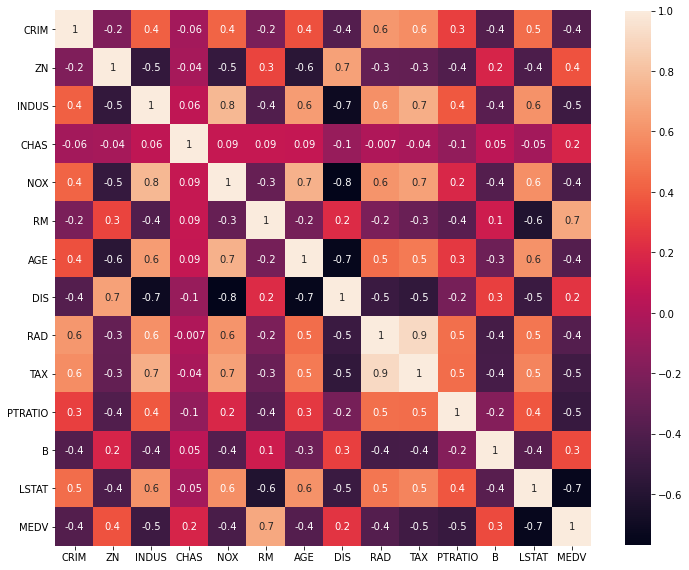

In [8]:
plt.figure(figsize = (12, 12))
sns.heatmap(corr, cbar = True, annot = True, square = True, cbar_kws = {'shrink': 0.82}, fmt = '.1g', annot_kws = {'size': 10})
plt.show()

## Seems RAD and TAX are correlated. Lets check with scatter plot

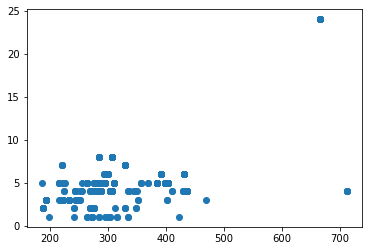

In [9]:
plt.scatter(data.TAX, data.RAD)
plt.show()

Its not confirmed with plot. So we are not deleting the features.

In [10]:
X = data.drop(columns = 'MEDV')
y = data['MEDV']

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

## Model Training

In [13]:
ada = AdaBoostRegressor()

In [14]:
#Model Training
ada.fit(x_train, y_train)

#Model prediction on training data
y_pred = ada.predict(x_train)

In [18]:
print('R2 score: ', r2_score(y_train, y_pred))

R2 score:  0.9158378366217358


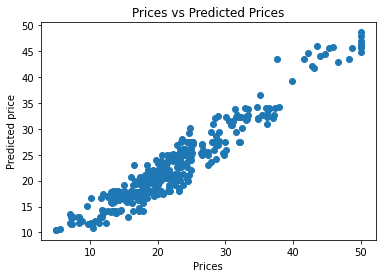

In [19]:
#Checking actual vs Predicted using graph
plt.scatter(y_train, y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted price')
plt.title('Prices vs Predicted Prices')
plt.show()

In [20]:
#Predicting test data with the model
y_test_pred = ada.predict(x_test)

In [21]:
#Model evaluation
accuracy = r2_score(y_test, y_test_pred)
accuracy

0.8361186786609722

## Hyperparameter using RandomizedSearchCV

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [23]:
dt = DecisionTreeRegressor()

In [24]:
params = {'n_estimators': [40, 47, 49, 50], 'learning_rate': [0.30, 0.40, 0.45]}

In [25]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(), cv = 5, param_distributions = params)

In [26]:
rnd_srch.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'n_estimators': [40, 47, 49, 50]})

In [27]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.45, n_estimators=40)

In [28]:
ada = AdaBoostRegressor(base_estimator = dt, learning_rate = 0.45, n_estimators = 40)

ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)
print(r2_score(y_test, y_pred))

0.8899008924891172
